In [14]:
import pandas as pd
import numpy as np
df=pd.read_csv("../collapsed_datasets/deviceMotion_3secs.csv").drop("Unnamed: 0", axis=1)
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
non_corr_df=df.drop(to_drop, axis=1)

X=non_corr_df.drop("class", axis=1)
y=non_corr_df["class"]

C:\Users\marco\AppData\Local\Temp\ipykernel_29388\305035750.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
C:\Users\marco\AppData\Local\Temp\ipykernel_29388\305035750.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [15]:
# in questo notebook andremo a cercare il miglior classificatore

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score


knn_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

res=cross_validate(knn_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

knn_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}
print(knn_results)

{'precision': 0.8952417079840798, 'recall': 0.8933128706519728, 'f1': 0.8937916297128006}


In [16]:
from sklearn.svm import SVC
SVC_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", SVC())
])

res=cross_validate(SVC_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

SVC_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(SVC_results)

{'precision': 0.8028175302922229, 'recall': 0.7729926554426284, 'f1': 0.7703303949147056}


In [17]:
from sklearn.tree import DecisionTreeClassifier
tree_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", DecisionTreeClassifier())
])

res=cross_validate(tree_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

tree_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(tree_results)

{'precision': 0.8420759745592321, 'recall': 0.8378066182960721, 'f1': 0.8394490705304072}


In [18]:
from sklearn.ensemble import RandomForestClassifier
ranfor_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", RandomForestClassifier(n_jobs=-1))
])

res=cross_validate(ranfor_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted"),
    'accuracy':make_scorer(accuracy_score)
}, cv=KFold(5, shuffle=True, random_state=12))

ranfor_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(ranfor_results)


{'precision': 0.9021047458823723, 'recall': 0.9011024445178041, 'f1': 0.9014432988000898}


In [19]:
from sklearn.linear_model import LogisticRegression
logregr_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", LogisticRegression(max_iter=1000))
])

res=cross_validate(logregr_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

logregr_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(logregr_results)

{'precision': 0.7931655879595957, 'recall': 0.7682311604026044, 'f1': 0.771049198787455}


In [20]:
from sklearn.naive_bayes import GaussianNB
nb_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", GaussianNB())
])

res=cross_validate(nb_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

nb_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(nb_results)

{'precision': 0.7262119509105412, 'recall': 0.683295170666723, 'f1': 0.6768482531664256}


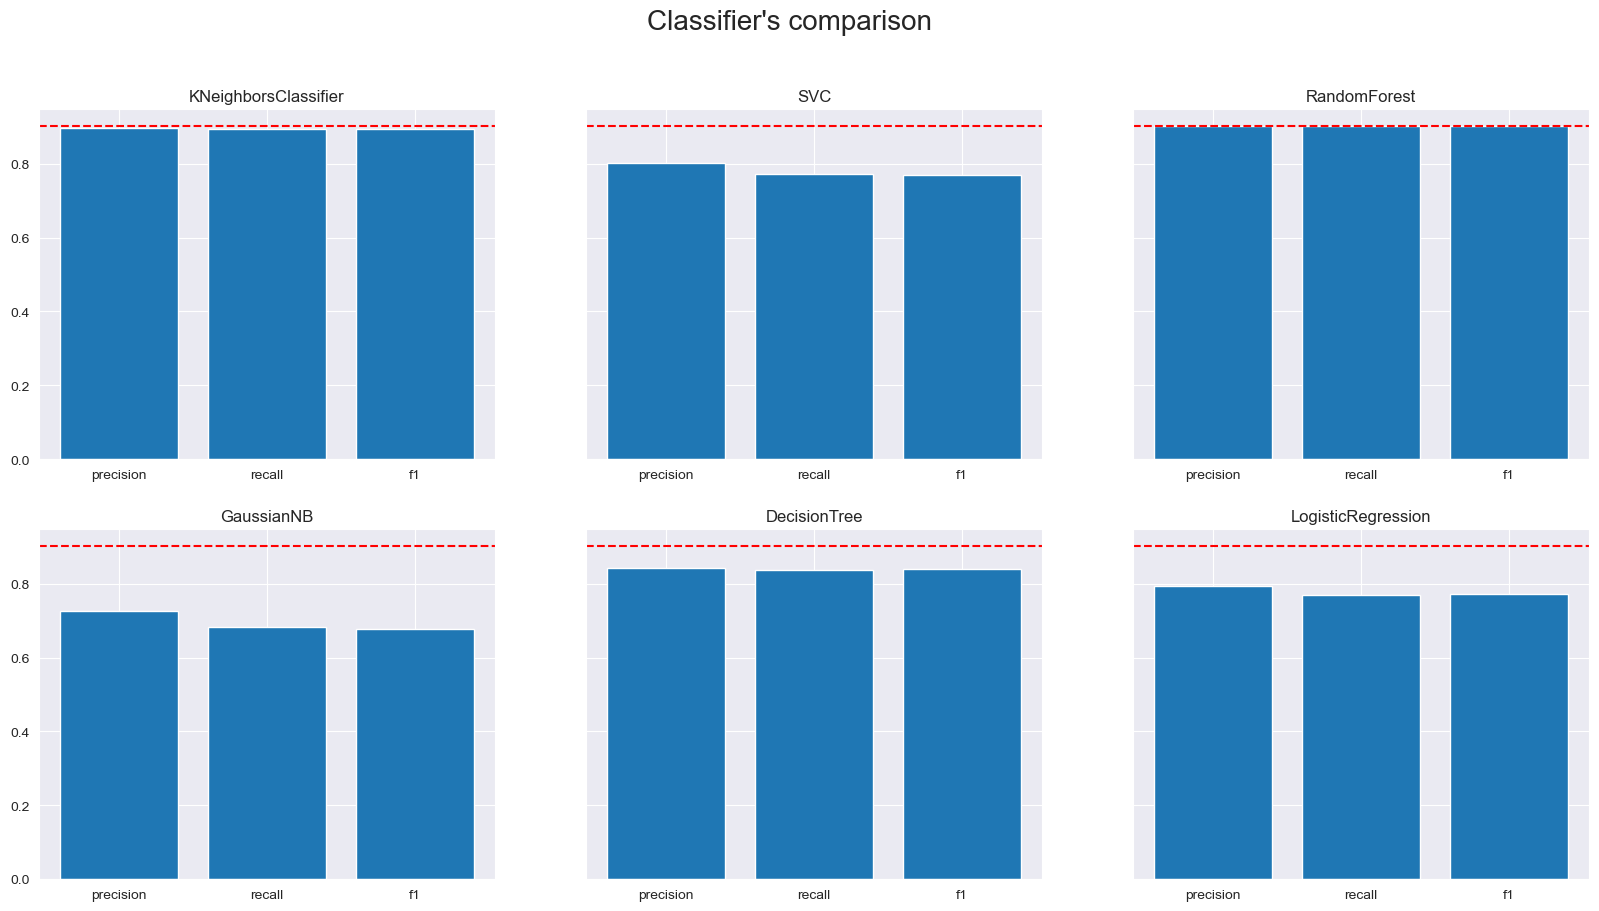

In [21]:
from matplotlib import pyplot as plt
f,axes=plt.subplots(2,3,figsize=(20,10), sharey=True)
f.suptitle("Classifier's comparison", fontsize=20)
h_max=np.max(list(ranfor_results.values()))
axes[0][0].bar(knn_results.keys(), knn_results.values())
axes[0][0].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[0][0].title.set_text("KNeighborsClassifier")
axes[0][1].bar(SVC_results.keys(), SVC_results.values())
axes[0][1].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[0][1].title.set_text("SVC")
axes[0][2].bar(ranfor_results.keys(), ranfor_results.values())
axes[0][2].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[0][2].title.set_text("RandomForest")
axes[1][0].bar(nb_results.keys(), nb_results.values())
axes[1][0].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[1][0].title.set_text("GaussianNB")
axes[1][1].bar(tree_results.keys(), tree_results.values())
axes[1][1].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[1][1].title.set_text("DecisionTree")
axes[1][2].bar(logregr_results.keys(), logregr_results.values())
axes[1][2].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[1][2].title.set_text("LogisticRegression")

Text(0, 0.5, 'Accuracy')

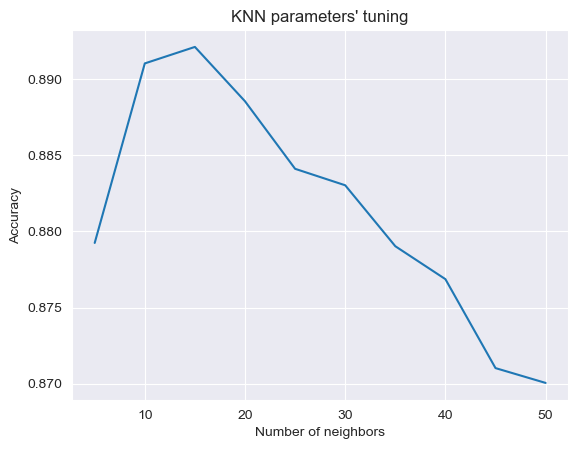

In [22]:
from sklearn.model_selection import cross_val_score

# let's see how KNN behave if we change the number of neighbors
results_list=[]


for n in range(1,51,5):
    pipe=Pipeline([
        ("scaler", RobustScaler()),
        ("sampling", SMOTE()),
        ("feature-selector", SelectKBest(k=8)),
        ("classifier", KNeighborsClassifier(n_neighbors=n))
    ])
    results=cross_val_score(pipe,X,y,cv=KFold(5, shuffle=True, random_state=123) )
    results_list.append(np.mean(results))

x=np.arange(1,11)
x*=5
plt.plot(x, results_list)
plt.title("KNN parameters' tuning")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")

# we can see that the highest value is obtained with n_neighbors=5

Text(0, 0.5, 'Accuracy')

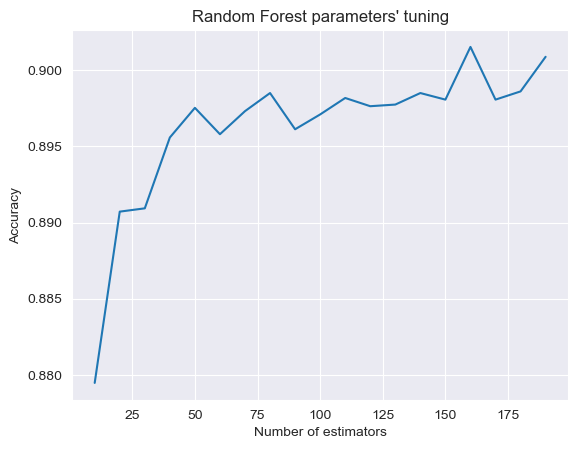

In [23]:
# Let's see how Random forest behave when changing the number of trees
results_list=[]


for n in range(10,200,10):
    pipe=Pipeline([
        ("scaler", RobustScaler()),
        ("sampling", SMOTE()),
        ("feature-selector", SelectKBest(k=8)),
        ("classifier", RandomForestClassifier(n_jobs=-1, n_estimators=n))
    ])
    results=cross_val_score(pipe,X,y,cv=KFold(5, shuffle=True, random_state=123) )
    results_list.append(np.mean(results))

x=np.arange(1,20)
x*=10
plt.plot(x, results_list)
plt.title("Random Forest parameters' tuning")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")

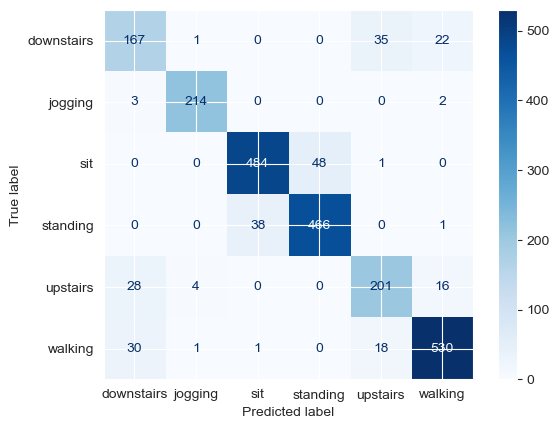

In [24]:
# let's print a confusion matrix in order to understand how the classifier is working
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ranfor_pipe.fit(X_train, y_train)
y_pred=ranfor_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=y.unique(), cmap=plt.cm.Blues)
# as we expected, the main problem is that sometimes we fail to recognize sit and standing, but we cannot overcome this problem.